In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.preprocessing import OneHotEncoder

In [2]:
weather_data = pd.read_csv("D:\ML\data\weatherAUS.csv", delimiter=',')
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

weather_data['Day'] = weather_data['Date'].dt.day
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Year'] = weather_data['Date'].dt.year

weather_data = weather_data.drop(['Date'], axis=1)

weather_data['RainTomorrow'] = weather_data['RainTomorrow'].replace(['Yes'], '1')
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].replace(['No'], '0')
weather_data

categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numeric_cols = list(set(weather_data.columns.values.tolist()) - set(categorical_cols))

weather_data[numeric_cols] = weather_data[numeric_cols].fillna(weather_data[numeric_cols].mean())

weather_data[categorical_cols] = np.where(weather_data[categorical_cols].isnull(), weather_data[categorical_cols].mode(), weather_data[categorical_cols])

weather_data = pd.get_dummies(weather_data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

weather_data = weather_data.astype(float)

weather_data.to_csv(r'D:\ML\data\weather_data.csv', index= False)

C:\Users\radio\AppData\Local\Temp\ipykernel_4816\4196839382.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_data[numeric_cols] = weather_data[numeric_cols].fillna(weather_data[numeric_cols].mean())


In [4]:
weather_data.to_csv(r'D:\ML\data\weather_data1.csv', index= False)

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(weather_data)

weather_data = scaler.transform(weather_data)
weather_data = pd.DataFrame(weather_data)

weather_data = weather_data[:10000]

weather_data

In [ ]:
print(weather_data[16].value_counts())

In [ ]:
balance = len(weather_data.loc[weather_data[16]==0])//len(weather_data.loc[weather_data[16]==1])

data_sample = weather_data.loc[weather_data[16]==1]
data_sample = data_sample.loc[data_sample.index.repeat(balance)]
data_n = pd.concat([weather_data.loc[weather_data[16]==0], data_sample]).sample(frac=1)

print(data_n[16].value_counts())

In [ ]:
y = data_n[16]
X = data_n.drop([16], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

In [11]:
y_bin_knn_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_bin_knn_pred)

0.7672264041690793

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_bin_knn_pred)

array([[1946,  716],
       [ 490, 2029]], dtype=int64)

In [14]:
import sys
sys.path.append('D:\ML\mylib')
import metrics_classification

print('accuracy: ', metrics_classification.accuracy(y_test, y_bin_knn_pred))
print('precision: ', metrics_classification.precision(y_test, y_bin_knn_pred))
print('recall: ', metrics_classification.recall(y_test, y_bin_knn_pred))
print('F1: ', metrics_classification.F1(y_test, y_bin_knn_pred))

accuracy:  0.7672264041690793
precision:  0.7310293012772352
recall:  0.7988505747126436
F1:  0.7634366418203217


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      2662
         1.0       0.74      0.81      0.77      2519

    accuracy                           0.77      5181
   macro avg       0.77      0.77      0.77      5181
weighted avg       0.77      0.77      0.77      5181



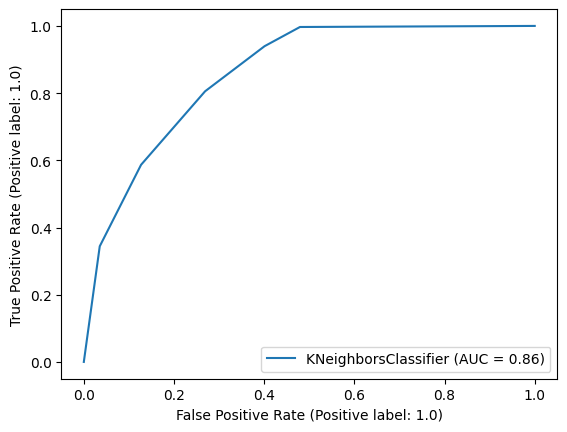

In [16]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76      2662
         1.0       0.76      0.69      0.73      2519

    accuracy                           0.75      5181
   macro avg       0.75      0.74      0.75      5181
weighted avg       0.75      0.75      0.75      5181



In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      2662
         1.0       0.82      0.78      0.80      2519

    accuracy                           0.81      5181
   macro avg       0.81      0.81      0.81      5181
weighted avg       0.81      0.81      0.81      5181



D:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2662
         1.0       0.84      0.82      0.83      2519

    accuracy                           0.84      5181
   macro avg       0.84      0.84      0.84      5181
weighted avg       0.84      0.84      0.84      5181



In [20]:
data_n = data_n[:3000]
y = data_n[16]
X = data_n.drop([16], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


X_train_np = X_train.to_numpy() 
X_test_np = X_test.to_numpy()

In [21]:
import sys
sys.path.append('D:\ML\mylib')
from Naive_Bayes import Naive_Bayes

naive_bayes = Naive_Bayes()
additions = naive_bayes.addition_for_class(X_train_np)

predictions = Naive_Bayes.get_predict(additions, X_test_np)
accuracy = Naive_Bayes.accuracy(X_test_np, predictions)
print('Accuracy: {0}%'.format(accuracy))

Accuracy: 71.51515151515152%


In [22]:
X_train_np = X_train.to_numpy() 
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()

In [23]:
import sys
sys.path.append('D:\ML\mylib')
from Knn import KNN

knn = KNN()
pred = []

for x in range (len(X_test_np)):
    neighbors = knn.neighbors(X_train_np, X_test_np[x])
    result = knn.prediction(neighbors)
    pred.append(result)

pred = np.round(pred)
print(knn.accuracy(X_test_np, pred))

0.20707070707070707
